- Downloading the dataset and storing it in the form of a dataframe

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

file_path = "Dev_data_to_be_shared.csv"
df = pd.read_csv(file_path)

## Performing Exploratory Data Analysis
- Step 1: Dropped the column named "account_number" as it is not required in predicting whether a credit card account will default.
- Step 2: Handled missing values in the dataset across various features by performing simple imputation. The strategy adopted is different for different feature variables. We had replaced the missing values for the independent features starting with "onus_attributes", "bureau_enquiry", "bureau" with their corresponding mean computed row-wise whereas for those features starting with "transaction_attributes" was filled by fitting a linear_regression model to redict the missing values.

In [3]:
df.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_13,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,transaction_attribute_17,transaction_attribute_18,transaction_attribute_19,transaction_attribute_20,transaction_attribute_21,transaction_attribute_22,transaction_attribute_23,transaction_attribute_24,transaction_attribute_25,transaction_attribute_26,transaction_attribute_27,transaction_attribute_28,transaction_attribute_29,transaction_attribute_30,transaction_attribute_31,transaction_attribute_32,transaction_attribute_33,transaction_attribute_34,transaction_attribute_35,transaction_attribute_36,transaction_attribute_37,transaction_attribute_38,transaction_attribute_39,transaction_attribute_40,transaction_attribute_41,transaction_attribute_42,transaction_attribute_43,transaction_attribute_44,transaction_attribute_45,transaction_attribute_46,transaction_attribute_47,transaction_attribute_48,transaction_attribute_49,transaction_attribute_50,transaction_attribute_51,transaction_attribute_52,transaction_attribute_53,transaction_attribute_54,transaction_attribute_55,transaction_attribute_56,transaction_attribute_57,transaction_attribute_58,transaction_attribute_59,transaction_attribute_60,transaction_attribute_61,transaction_attribute_62,transaction_attribute_63,transaction_attribute_64,transaction_attribute_65,transaction_attribute_66,transaction_attribute_67,transaction_attribute_68,transaction_attribute_69,transaction_attribute_70,transaction_attribute_71,transaction_attribute_72,transaction_attribute_73,transaction_attribute_74,transaction_attribute_75,transaction_attribute_76,transaction_attribute_77,transaction_attribute_78,transaction_attribute_79,transaction_attribute_80,transaction_attribute_81,transaction_attribute_82,transaction_attribute_83,transaction_attribute_84,transaction_attribute_85,transaction_attribute_86,transaction_attribute_87,transaction_attribute_88,transaction_attribute_89,transaction_attribute_90,transaction_attribute_91,transaction_attribute_92,transaction_attribute_93,transaction_attribute_94,transaction_attribute_95,transaction_attribute_96,transaction_attribute_97,transaction_attribute_98,transaction_attribute_99,transaction_attribute_100,transaction_attribute_101,transaction_attribute_102,transaction_attribute_103,transaction_attribute_104,transaction_attribute_105,transaction_attribute_106,transaction_attribute_107,transaction_attribute_108,transaction_attribute_109,transaction_attribute_110,transaction_attribute_111,transaction_attribute_112,transaction_attribute_113,transaction_attribute_114,transaction_attribute_115,transaction_attribute_116,transaction_attribute_117,transaction_attribute_118,transaction_attribute_119,transaction_attribute_120,transaction_attribute_121,transaction_attribute_122,transaction_attribute_123,transaction_attribute_124,transaction_attribute_125,transaction_attribute_126,transaction_attribute_127,transaction_attribute_128,transaction_attribute_129,transaction_attribute_130,transaction_attribute_131,transaction_attribute_132,transaction_attribute_133,transaction_attribute_134,transaction_attribute_135,transaction_attribute_136,transaction_attribute_137,transaction_attribute_138,transaction_attribute_139,transaction_attribute_140,transaction_attribute_141,transaction_attribute_142,transaction_attribute_143,transaction_attribute_144,transaction_attribute_145,transaction_attribute_146,transaction_attribute_147,transaction_attribute_148,transaction_attribute_149,transaction_attribute_150,transaction_attribute_151,transaction_attribute_152,transaction_attribute_153,transaction_attribute_154,transaction_attribute_155,transaction_attribute_156,transactio

In [4]:
df.shape

(96806, 1216)

In [5]:
df.drop(columns=['account_number'], inplace=True)
print(df.columns.tolist())

['bad_flag', 'onus_attribute_1', 'transaction_attribute_1', 'transaction_attribute_2', 'transaction_attribute_3', 'transaction_attribute_4', 'transaction_attribute_5', 'transaction_attribute_6', 'transaction_attribute_7', 'transaction_attribute_8', 'transaction_attribute_9', 'transaction_attribute_10', 'transaction_attribute_11', 'transaction_attribute_12', 'transaction_attribute_13', 'transaction_attribute_14', 'transaction_attribute_15', 'transaction_attribute_16', 'transaction_attribute_17', 'transaction_attribute_18', 'transaction_attribute_19', 'transaction_attribute_20', 'transaction_attribute_21', 'transaction_attribute_22', 'transaction_attribute_23', 'transaction_attribute_24', 'transaction_attribute_25', 'transaction_attribute_26', 'transaction_attribute_27', 'transaction_attribute_28', 'transaction_attribute_29', 'transaction_attribute_30', 'transaction_attribute_31', 'transaction_attribute_32', 'transaction_attribute_33', 'transaction_attribute_34', 'transaction_attribute_3

In [6]:
missing_values = df.isnull().sum()

In [ ]:
onus_columns = [col for col in df.columns if col.startswith("onus_attribute_")]
df['onus_mean'] = df[onus_columns].mean(axis=1)
df[onus_columns] = df[onus_columns].apply(lambda row: row.fillna(df.loc[row.name, 'onus_mean']), axis=1)

bureau_enquiry_columns = [col for col in df.columns if col.startswith("bureau_enquiry")]
df['enquiry_mean'] = df.filter(like='bureau_enquiry_').mean(axis=1)
df['enquiry_mean'].fillna(0, inplace=True)

In [ ]:
transaction_columns = [col for col in df.columns if col.startswith("transaction_attribute_")]
bureau_columns = [col for col in df.columns if col.startswith("bureau_")]
onus_columns = [col for col in df.columns if col.startswith("onus_attribute_")]
bureau_enquiry_columns = [col for col in df.columns if col.startswith("bureau_enquiry_")]

def fast_impute_columns(df, columns):
    df_imputed = df[columns].copy()
    df_imputed = df_imputed.interpolate(method='linear', axis=1, limit_direction='both')
    df_imputed = df_imputed.fillna(method='bfill', axis=1)
    df_imputed = df_imputed.fillna(method='ffill', axis=1)
    df_imputed = df_imputed.fillna(0)
    return df_imputed

df[transaction_columns] = fast_impute_columns(df, transaction_columns)
df[bureau_columns] = fast_impute_columns(df, bureau_columns)
df[onus_columns] = df[onus_columns].apply(lambda row: row.fillna(df.loc[row.name, 'onus_mean']), axis=1)
df[bureau_enquiry_columns ] = df[bureau_enquiry_columns ].apply(
    lambda row: row.fillna(df.loc[row.name, 'enquiry_mean']), axis=1
)

# Feature Engineering

- Various features have been derived from the given raw data to understand the dataset better, gain meaningful insights and understand the importance level of various attributes. This helps the model in predicting the probability that a credit card account will default better.

In [ ]:
df['total_enquiries'] = df.filter(like='bureau_enquiry_').sum(axis=1)
weights = np.exp(-np.linspace(0, 1, df.filter(like='bureau_enquiry_').shape[1]))
weights /= weights.sum()
df['weighted_enquiries'] = (df.filter(like='bureau_enquiry_') * weights).sum(axis=1)
df['enquiry_mean'] = df.filter(like='bureau_enquiry_').mean(axis=1)
df['enquiry_std'] = df.filter(like='bureau_enquiry_').std(axis=1)
time_intervals = np.arange(1, 51)
df['enquiry_frequency'] = df.filter(like='bureau_enquiry_').sum(axis=1) / time_intervals.sum()


df['onus_mean'] = df.filter(like='onus_attribute_').mean(axis=1)
df['onus_std'] = df.filter(like='onus_attribute_').std(axis=1)
df['onus_min'] = df.filter(like='onus_attribute_').min(axis=1)
df['onus_max'] = df.filter(like='onus_attribute_').max(axis=1)
df['credit_utilization_ratio'] = df.filter(like='transaction_attribute_').sum(axis=1) / (
    df.filter(like='onus_attribute_').sum(axis=1) + 1e-5
)
df['enquiries_to_credit_limit_ratio'] = df.filter(like='bureau_enquiry_').sum(axis=1) / (
    df.filter(like='onus_attribute_').sum(axis=1) + 1e-5
)
df['high_utilization_flag'] = (df['credit_utilization_ratio'] > 0.8).astype(int)
recent_columns = [f'onus_attribute_{i}' for i in range(1, 24)]
older_columns = [f'onus_attribute_{i}' for i in range(24, 49)]
df['onus_trend'] = df[recent_columns].mean(axis=1) - df[older_columns].mean(axis=1)


df['dynamic_threshold'] = df.filter(like='onus_attribute_').mean(axis=1) * 0.5 
df['high_value_transaction_ratio'] = df.apply(
    lambda row: (row.filter(like='transaction_attribute_') > row['dynamic_threshold']).sum() / len(row.filter(like='transaction_attribute_')), axis=1
)
df.drop(columns=['dynamic_threshold'], inplace=True)
df['transaction_volatility'] = df.filter(like='transaction_attribute_').std(axis=1)
volatility_threshold = df['transaction_volatility'].quantile(0.75) 
credit_utilization_threshold = 0.9
df['high_risk_flag'] = ((df['transaction_volatility'] > volatility_threshold) &
                        (df['credit_utilization_ratio'] > credit_utilization_threshold))


bureau_cols = df.filter(like='bureau_').columns
df['bureau_mean'] = df[bureau_cols].mean(axis=1)
df['bureau_median'] = df[bureau_cols].median(axis=1)
df['bureau_max'] = df[bureau_cols].max(axis=1)
df['bureau_min'] = df[bureau_cols].min(axis=1)
df['bureau_std'] = df[bureau_cols].std(axis=1)

if 'transaction_mean' in df.columns:
    df.drop(columns=['transaction_mean'], inplace=True)
else:
    print("Column 'transaction_mean' does not exist in the DataFrame.")

In [12]:
df.describe()

bad_flag  onus_attribute_1  transaction_attribute_1  \
count  96806.000000      9.680600e+04             96806.000000   
mean       0.014173      1.140891e+05                 7.076295   
std        0.118203      1.634030e+05              1301.809963   
min        0.000000     -1.978007e+05                 0.000000   
25%        0.000000      1.320923e+03                 0.000000   
50%        0.000000      6.900000e+04                 0.000000   
75%        0.000000      1.450000e+05                 0.000000   
max        1.000000      2.800000e+06            398936.791000   

       transaction_attribute_2  transaction_attribute_3  \
count             96806.000000             96806.000000   
mean                  0.001632                 3.026114   
std                   0.102534               259.323917   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                  25.000000             55000.000000   

       transaction_attribute_4  transaction_attribute_5  \
count             96806.000000             96806.000000   
mean                 57.157698                 0.004669   
std                2721.663603                 0.111425   
min             -109800.476600                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              358986.000000                12.000000   

       transaction_attribute_6  transaction_attribute_7  \
count             96806.000000             96806.000000   
mean                 49.569676                 0.059914   
std                2163.897439                12.213200   
min               -3498.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              358986.000000              3150.000000   

       transaction_attribute_8  transaction_attribute_9  \
count             96806.000000             96806.000000   
mean                  0.000155                 0.021176   
std                   0.029281                 4.112785   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   8.000000              1200.000000   

       transaction_attribute_10  transaction_attribute_11  \
count              96806.000000              96806.000000   
mean                 136.832832                  0.092856   
std                 1817.872163                  0.712041   
min                -9287.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max               170000.000000                 44.000000   

       transaction_attribute_12  transaction_attribute_13  \
count              96806.000000              96806.000000   
mean                  94.803756                235.101120   
std                 1198.348060               4374.408896   
min                    0.000000             -48500.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                90000.000000             406500.000000   

       transaction_attribute_14  transaction_attribute_15  \
count              96806.000000              96806.000000   
mean                   0.019245                207.340236   
std  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1236 entries, bad_flag to bureau_std
dtypes: bool(1), float64(1233), int32(1), int64(1)
memory usage: 911.9 MB


In [ ]:
numerical_features = [
    'total_enquiries', 'weighted_enquiries', 'enquiry_mean', 'enquiry_std', 
    'credit_utilization_ratio', 'transaction_volatility', 'bureau_mean', 'bureau_std'
]
categorical_features = ['high_utilization_flag', 'bad_flag']

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, column in enumerate(numerical_features):
    sns.histplot(df[column], kde=True, bins=20, color='blue', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}', fontsize=12)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, column in enumerate(numerical_features):
    sns.boxplot(data=df, x='bad_flag', y=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, column in enumerate(categorical_features):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Bar Chart of {column}', fontsize=12)
plt.tight_layout()
plt.show()

selected_features = ['total_enquiries', 'weighted_enquiries', 'credit_utilization_ratio', 'bad_flag']
sns.pairplot(df[selected_features], hue='bad_flag', palette='Set1')
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


time_based_features = [f'transaction_attribute_{i}' for i in range(1, 665)]
static_features = (
    [f'onus_attribute_{i}' for i in range(1, 49)] +
    [f'bureau_enquiry_{i}' for i in range(1, 51)] +
    [f'bureau_{i}' for i in range(1, 453)] +
    ['onus_mean', 'enquiry_mean', 'bureau_mean', 'total_enquiries',
     'weighted_enquiries', 'enquiry_std', 'enquiry_frequency', 'onus_std',
     'onus_min', 'onus_max', 'credit_utilization_ratio',
     'enquiries_to_credit_limit_ratio', 'high_utilization_flag',
     'onus_trend', 'high_value_transaction_ratio', 'transaction_volatility',
     'bureau_median', 'bureau_max', 'bureau_min', 'bureau_std']
)
features = time_based_features + static_features
X = df[features]
y = df['bad_flag']

Epoch 1/120


c:\Users\Arjun\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_192', 'keras_tensor_199']. Received: the structure of inputs=('*', '*')
  warnings.warn(


121/121 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - auc: 0.5112 - loss: 18.5904 - precision: 0.2969 - recall: 0.7181 - val_auc: 0.6407 - val_loss: 17.1132 - val_precision: 0.0146 - val_recall: 0.9556 - learning_rate: 5.0000e-05
Epoch 2/120
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - auc: 0.5737 - loss: 16.7686 - precision: 0.3108 - recall: 0.7616 - val_auc: 0.6778 - val_loss: 15.3972 - val_precision: 0.0167 - val_recall: 0.9074 - learning_rate: 5.0000e-05
Epoch 3/120
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - auc: 0.6063 - loss: 15.0787 - precision: 0.3204 - recall: 0.7968 - val_auc: 0.6979 - val_loss: 13.8490 - val_precision: 0.0175 - val_recall: 0.9037 - learning_rate: 5.0000e-05
Epoch 4/120
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - auc: 0.6629 - loss: 13.5220 - precision: 0.3291 - recall: 0.8720 - val_auc: 0.7047 - val_loss: 12.4215 - val_precision: 0.0175 - val_recall: 0.9111 - learning_rate: 5.0000e-05
Epoch 5/120
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - auc: 0.6644 - loss: 12.147

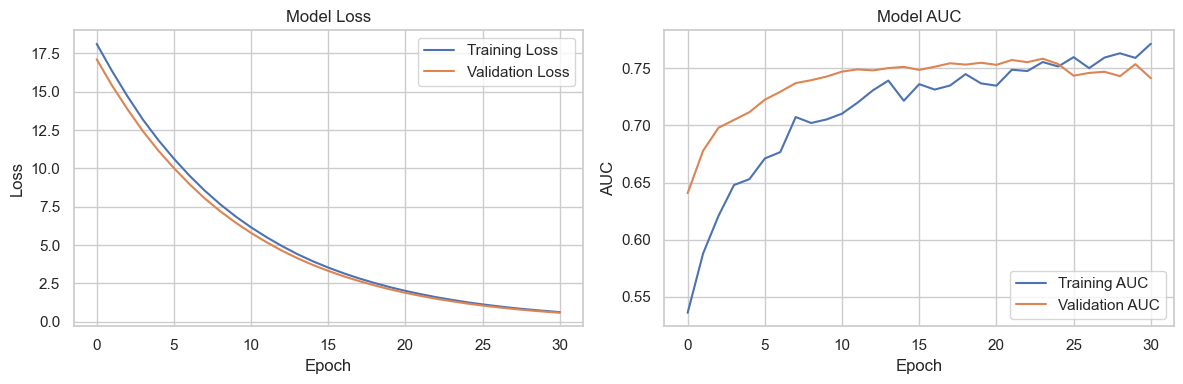

In [39]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Concatenate, Dropout, BatchNormalization
import tensorflow as tf
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

class ImbalancedHybridCreditScorer:
    def __init__(self, n_time_features=664, time_window=6):
        self.time_window = time_window
        self.model = None
        self.n_time_features = n_time_features
        
    def reshape_temporal_data(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
            
        temporal_data = X[:, :self.n_time_features]
        n_samples = temporal_data.shape[0]
        valid_features = (self.n_time_features // self.time_window) * self.time_window
        temporal_data = temporal_data[:, :valid_features]
        return temporal_data.reshape(n_samples, self.time_window, -1)

    def build_hybrid_model(self, static_dim, temporal_dim):
        temporal_input = Input(shape=(self.time_window, temporal_dim))
        lstm_out = LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.02), recurrent_regularizer=tf.keras.regularizers.l2(0.02))(temporal_input)
        lstm_out = BatchNormalization()(lstm_out)
        lstm_out = Dropout(0.3)(lstm_out)
        lstm_out = LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.02), recurrent_regularizer=tf.keras.regularizers.l2(0.02))(lstm_out)
        lstm_out = BatchNormalization()(lstm_out)
        lstm_out = Dropout(0.3)(lstm_out)
        
        static_input = Input(shape=(static_dim,))
        dense_out = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(static_input)
        dense_out = BatchNormalization()(dense_out)
        dense_out = Dropout(0.4)(dense_out)
        dense_out = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(dense_out)
        dense_out = BatchNormalization()(dense_out)
        dense_out = Dropout(0.4)(dense_out)
        
        merged = Concatenate()([lstm_out, dense_out])
        merged = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(merged)
        merged = BatchNormalization()(merged)
        merged = Dropout(0.3)(merged)
        
        output = Dense(1, activation='sigmoid')(merged)
        
        model = Model(inputs=[temporal_input, static_input], outputs=output)
        
        def focal_loss(gamma=2.0, alpha=0.75):
            def focal_loss_fixed(y_true, y_pred):
                epsilon = tf.keras.backend.epsilon()
                y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
                cross_entropy = -y_true * tf.math.log(y_pred)
                focal_term = (1 - y_pred) ** gamma
                weights = y_true * alpha + (1 - y_true) * (1 - alpha)
                return tf.reduce_mean(weights * focal_term * cross_entropy)
            return focal_loss_fixed
        
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005, clipnorm=1.0)
        
        model.compile(
            optimizer=optimizer,
            loss=focal_loss(gamma=2.0, alpha=0.75),
            metrics=[
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(thresholds=0.3, name='precision'),
                tf.keras.metrics.Recall(thresholds=0.3, name='recall')
            ]
        )
        
        return model

    def custom_balanced_sample(self, X, y, minority_ratio=0.4):
        minority_mask = y == 1
        majority_mask = ~minority_mask
        
        X_minority = X[minority_mask]
        y_minority = y[minority_mask]
        X_majority = X[majority_mask]
        y_majority = y[majority_mask]
        
        n_minority = len(y_minority)
        desired_majority = int(n_minority / minority_ratio)
        
        majority_indices = np.random.choice(len(y_majority), size=min(desired_majority, len(y_majority)), replace=False)
        X_majority_under = X_majority[majority_indices]
        y_majority_under = y_majority[majority_indices]
        
        if desired_majority > len(y_majority):
            n_synthetic = desired_majority - len(y_majority)
            synthetic_indices = np.random.randint(0, len(y_minority), size=(n_synthetic, 2))
            weights = np.random.random(size=(n_synthetic, 1))
            
            X_synthetic = (X_minority[synthetic_indices[:, 0]] * weights + X_minority[synthetic_indices[:, 1]] * (1 - weights))
            y_synthetic = np.ones(n_synthetic)
            
            X_minority = np.vstack([X_minority, X_synthetic])
            y_minority = np.hstack([y_minority, y_synthetic])
        
        X_resampled = np.vstack([X_majority_under, X_minority])
        y_resampled = np.hstack([y_majority_under, y_minority])
        
        shuffle_idx = np.random.permutation(len(y_resampled))
        X_resampled = X_resampled[shuffle_idx]
        y_resampled = y_resampled[shuffle_idx]
        
        return X_resampled, y_resampled

    def fit(self, X_train_scaled, y_train, X_val_scaled=None, y_val=None, epochs=50, batch_size=512, early_stopping_patience=7):
        if isinstance(X_train_scaled, pd.DataFrame):
            X_train_scaled = X_train_scaled.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if isinstance(X_val_scaled, pd.DataFrame):
            X_val_scaled = X_val_scaled.values
        if isinstance(y_val, pd.Series):
            y_val = y_val.values
            
        X_temporal = self.reshape_temporal_data(X_train_scaled)
        X_static = X_train_scaled[:, self.n_time_features:]
        
        X_temporal_flat = X_temporal.reshape(X_temporal.shape[0], -1)
        X_combined = np.hstack([X_temporal_flat, X_static])
        
        X_resampled, y_resampled = self.custom_balanced_sample(X_combined, y_train)
        
        temporal_size = X_temporal.shape[1] * X_temporal.shape[2]
        X_temporal_resampled = X_resampled[:, :temporal_size].reshape(-1, X_temporal.shape[1], X_temporal.shape[2])
        X_static_resampled = X_resampled[:, temporal_size:]
        
        self.model = self.build_hybrid_model(X_static.shape[1], X_temporal.shape[2])
        
        validation_data = None
        if X_val_scaled is not None and y_val is not None:
            X_val_temporal = self.reshape_temporal_data(X_val_scaled)
            X_val_static = X_val_scaled[:, self.n_time_features:]
            validation_data = ([X_val_temporal, X_val_static], y_val)
        
        callbacks = [
            tf.keras.callbacks.EarlyStopping(
                monitor='val_auc' if validation_data else 'auc',
                patience=early_stopping_patience,
                mode='max',
                restore_best_weights=True,
                min_delta=0.001
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss' if validation_data else 'loss',
                factor=0.5,
                patience=5,
                min_lr=0.000001,
                verbose=1
            )
        ]
        
        history = self.model.fit(
            [X_temporal_resampled, X_static_resampled],
            y_resampled,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )
        
        return history
    
    def predict_proba(self, X_scaled, threshold=0.3):
        if self.model is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")
            
        if isinstance(X_scaled, pd.DataFrame):
            X_scaled = X_scaled.values
            
        X_temporal = self.reshape_temporal_data(X_scaled)
        X_static = X_scaled[:, self.n_time_features:]
        
        probas = self.model.predict([X_temporal, X_static]).ravel()
        return probas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

model = ImbalancedHybridCreditScorer(n_time_features=664)
history = model.fit(
    X_train_scaled,
    y_train,
    X_val_scaled=X_test_scaled,
    y_val=y_test,
    epochs= 120,
    batch_size= 32
)

predictions = model.predict_proba(X_test_scaled)
binary_predictions = (predictions >= 0.3).astype(int)

print("\nModel Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))
print(f"\nAUC-ROC Score: {roc_auc_score(y_test, predictions):.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
catboost = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
logistic_regression.fit(X_train_scaled, y_train)
lr_predictions = logistic_regression.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

In [16]:
xgboost.fit(X_train, y_train)
xgb_predictions = xgboost.predict(X_test)
print("\nXGBoost Report:")
print(classification_report(y_test, xgb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))


XGBoost Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19092
           1       0.14      0.00      0.01       270

    accuracy                           0.99     19362
   macro avg       0.56      0.50      0.50     19362
weighted avg       0.97      0.99      0.98     19362

Confusion Matrix:
[[19086     6]
 [  269     1]]


In [ ]:
file_path = "validation_data_to_be_shared.csv"
test_df = pd.read_csv(file_path)

test_df.shape
missing_values = test_df.isnull().sum()


onus_columns = [col for col in test_df.columns if col.startswith("onus_attribute_")]
test_df['onus_mean'] = test_df[onus_columns].mean(axis=1)
test_df[onus_columns] = test_df[onus_columns].apply(lambda row: row.fillna(test_df.loc[row.name, 'onus_mean']), axis=1)

transaction_columns = [col for col in test_df.columns if col.startswith("transaction_attribute_")]
bureau_columns = [col for col in test_df.columns if col.startswith("bureau_")]
onus_columns = [col for col in test_df.columns if col.startswith("onus_attribute_")]
bureau_enquiry_columns = [col for col in test_df.columns if col.startswith("bureau_enquiry_")]

def fast_impute_columns(test_df, columns):
    test_df_imputed = test_df[columns].copy()
    test_df_imputed = test_df_imputed.interpolate(method='linear', axis=1, limit_direction='both')
    test_df_imputed = test_df_imputed.fillna(method='bfill', axis=1)
    test_df_imputed = test_df_imputed.fillna(method='ffill', axis=1)
    test_df_imputed = test_df_imputed.fillna(0)
    return test_df_imputed

test_df[transaction_columns] = fast_impute_columns(test_df, transaction_columns)
test_df[bureau_columns] = fast_impute_columns(test_df, bureau_columns)
test_df[onus_columns] = fast_impute_columns(test_df, onus_columns)
test_df[bureau_enquiry_columns] = fast_impute_columns(test_df, bureau_enquiry_columns)

In [ ]:
test_df.isna().sum()

In [ ]:
test_df['total_enquiries'] = test_df.filter(like='bureau_enquiry_').sum(axis=1)
weights = np.exp(-np.linspace(0, 1, test_df.filter(like='bureau_enquiry_').shape[1]))
weights /= weights.sum()
test_df['weighted_enquiries'] = (test_df.filter(like='bureau_enquiry_') * weights).sum(axis=1)
test_df['enquiry_mean'] = test_df.filter(like='bureau_enquiry_').mean(axis=1)
test_df['enquiry_std'] = test_df.filter(like='bureau_enquiry_').std(axis=1)
time_intervals = np.arange(1, 51)
test_df['enquiry_frequency'] = test_df.filter(like='bureau_enquiry_').sum(axis=1) / time_intervals.sum()


test_df['onus_mean'] = test_df.filter(like='onus_attribute_').mean(axis=1)
test_df['onus_std'] = test_df.filter(like='onus_attribute_').std(axis=1)
test_df['onus_min'] = test_df.filter(like='onus_attribute_').min(axis=1)
test_df['onus_max'] = test_df.filter(like='onus_attribute_').max(axis=1)
test_df['credit_utilization_ratio'] = test_df.filter(like='transaction_attribute_').sum(axis=1) / (
    test_df.filter(like='onus_attribute_').sum(axis=1) + 1e-5
)
test_df['enquiries_to_credit_limit_ratio'] = test_df.filter(like='bureau_enquiry_').sum(axis=1) / (
    test_df.filter(like='onus_attribute_').sum(axis=1) + 1e-5
)
test_df['high_utilization_flag'] = (test_df['credit_utilization_ratio'] > 0.8).astype(int)
recent_columns = [f'onus_attribute_{i}' for i in range(1, 24)]
older_columns = [f'onus_attribute_{i}' for i in range(24, 49)]
test_df['onus_trend'] = test_df[recent_columns].mean(axis=1) - test_df[older_columns].mean(axis=1)


test_df['dynamic_threshold'] = test_df.filter(like='onus_attribute_').mean(axis=1) * 0.5 
test_df['high_value_transaction_ratio'] = test_df.apply(
    lambda row: (row.filter(like='transaction_attribute_') > row['dynamic_threshold']).sum() / len(row.filter(like='transaction_attribute_')), axis=1
)
test_df.drop(columns=['dynamic_threshold'], inplace=True)
test_df['transaction_volatility'] = test_df.filter(like='transaction_attribute_').std(axis=1)
volatility_threshold = test_df['transaction_volatility'].quantile(0.75) 
credit_utilization_threshold = 0.9
test_df['high_risk_flag'] = ((test_df['transaction_volatility'] > volatility_threshold) &
                        (test_df['credit_utilization_ratio'] > credit_utilization_threshold))


bureau_cols = test_df.filter(like='bureau_').columns
test_df['bureau_mean'] = test_df[bureau_cols].mean(axis=1)
test_df['bureau_median'] = test_df[bureau_cols].median(axis=1)
test_df['bureau_max'] = test_df[bureau_cols].max(axis=1)
test_df['bureau_min'] = test_df[bureau_cols].min(axis=1)
test_df['bureau_std'] = test_df[bureau_cols].std(axis=1)

if 'transaction_mean' in test_df.columns:
    test_df.drop(columns=['transaction_mean'], inplace=True)
else:
    print("Column 'transaction_mean' does not exist in the DataFrame.")

In [45]:
account_numbers = test_df['account_number']
X_new = test_df[features]
X_new_scaled = scaler.transform(X_new)

X_new_scaled = pd.DataFrame(X_new_scaled, columns=X_new.columns, index=X_new.index)
predictions = model.predict_proba(X_new_scaled)
predictions = predictions.flatten().round(5)
results_df = pd.DataFrame({
    'account_number': account_numbers,
    'bad_flag': predictions
})

results_df.to_csv('results.csv', index=False)
print("Predictions saved to results.csv")

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Predictions saved to results.csv
